In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
df

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,1.595203e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,1.595203e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


## 🌱 Dataset: Environmental Sensor Telemetry Data
Este proyecto inicial se basa en un dataset de telemetría ambiental que incluye lecturas de temperatura, humedad, gases y movimiento. Estos datos fueron generados a través de una serie de **dispositivos IoT conectados a Raspberry Pi**, que fueron colocados en ubicaciones con condiciones ambientales variadas.

### 🧠 Características del Dataset:
- **Periodo**: 07/12/2020 - 07/19/2020
- **Dispositivos IoT**: 
  - `00:0f:00:70:91:0a`: Condiciones estables, más frío y húmedo.
  - `1c:bf:ce:15:ec:4d`: Temperatura y humedad altamente variables.
  - `b8:27:eb:bf:9d:51`: Condiciones estables, más cálido y seco.
  
- **Sensores y Medidas**:
  - Temperatura (°F)
  - Humedad (%)
  - Monóxido de Carbono (ppm)
  - Gas LP (ppm)
  - Detección de humo (ppm)
  - Luz (Booleano)
  - Movimiento (Booleano)
  
- **Formato de Mensajes**: Los datos fueron transmitidos usando el protocolo MQTT, que sigue el estándar ISO para la transmisión de telemetría en redes de sensores.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [6]:
df.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


__Como podemos apreciar todos los datos estan en formato numerico por lo que no necesitan un pre-procesado__. De igual manera los datos __no contienen nulos__

__Tomaremos la variable de temperatura como variable objetivo y las demas como variables predictoras__

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_numerical_columns(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    fig, axes = plt.subplots(len(numeric_columns), 3, figsize=(18, 5 * len(numeric_columns)))
    fig.tight_layout(pad=5.0)

    # Graficar cada columna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(df[column], ax=axes[i, 0], kde=True)
        axes[i, 0].set_title(f'Histograma de {column}')

        sns.boxplot(x=df[column], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot de {column}')

        if i < len(numeric_columns) - 1:
            sns.scatterplot(x=df[column], y=df[numeric_columns[i + 1]], ax=axes[i, 2])
            axes[i, 2].set_title(f'Scatter de {column} vs {numeric_columns[i + 1]}')
        else:
            axes[i, 2].axis('off')

    plt.show()

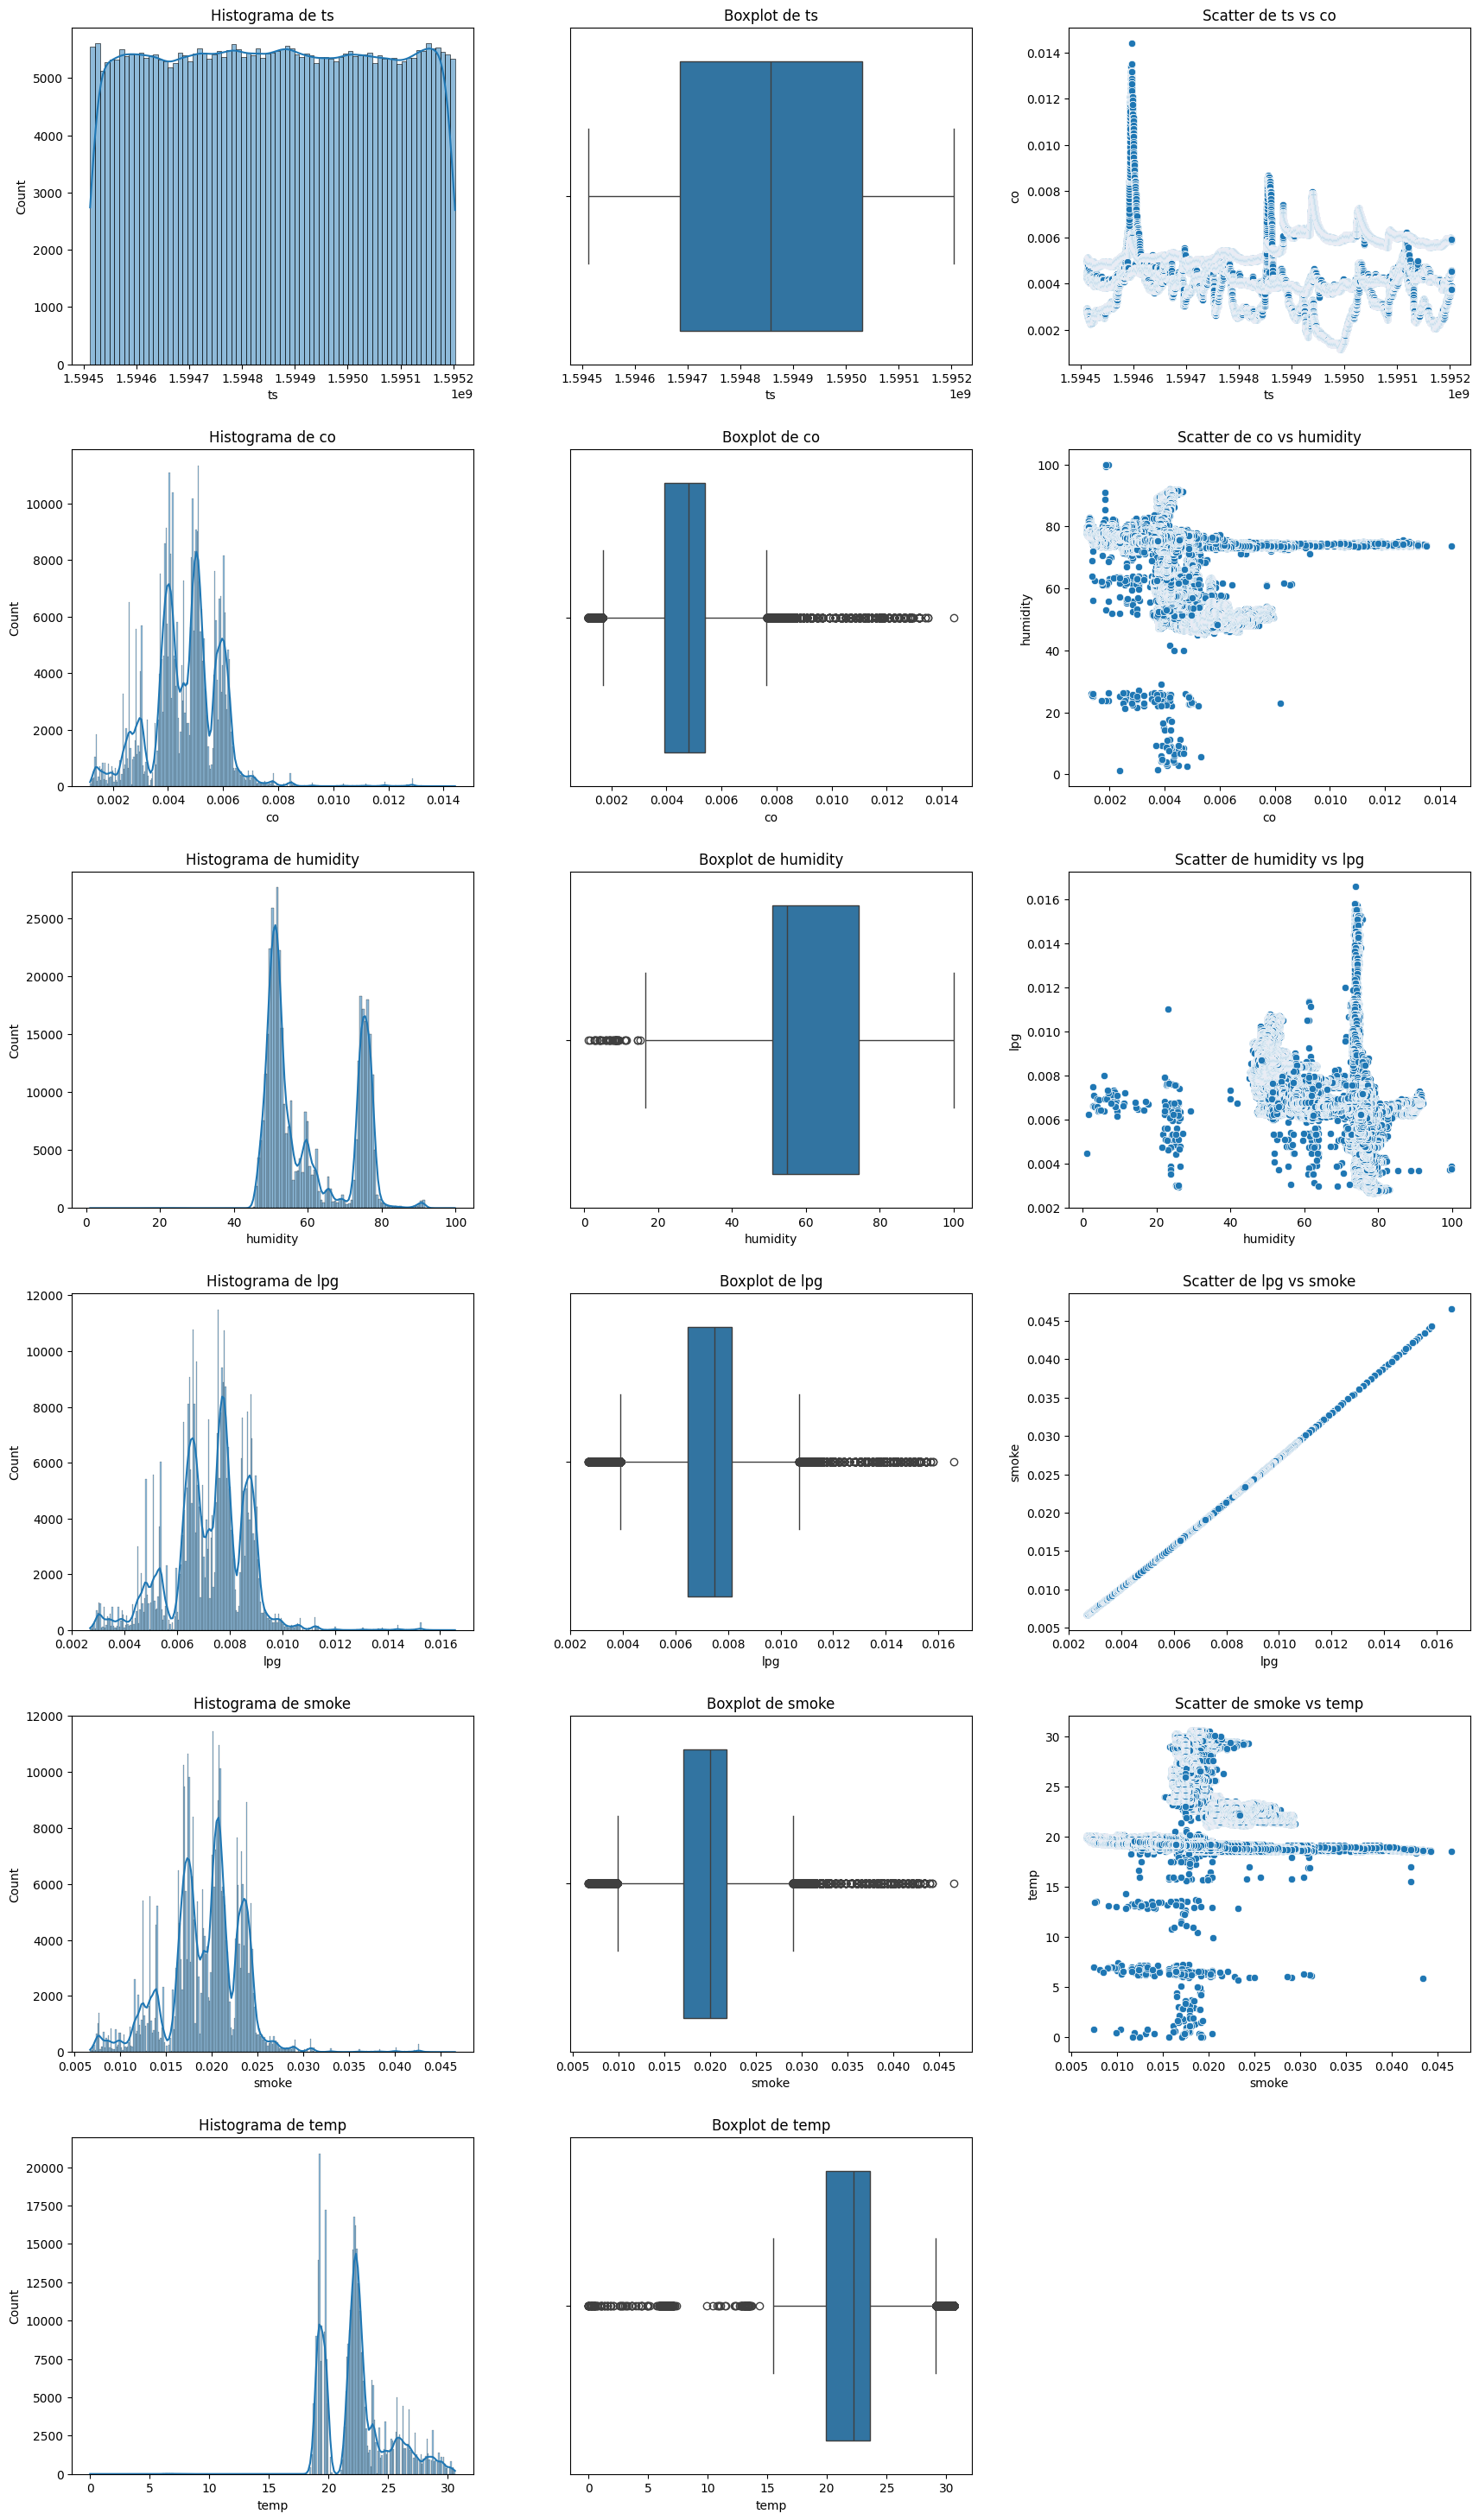

In [5]:
plot_numerical_columns(df)